<div align="center">

# <span style="font-size: 2em;">Welcome to Linear Regression!</span>

</div>

<p align="center">
  <img src="img_perceptron-Photoroom.png" alt="Header" />
</p>

<div align="center">

# <span style="font-size: em;">Supervised Learning!</span>

</div>

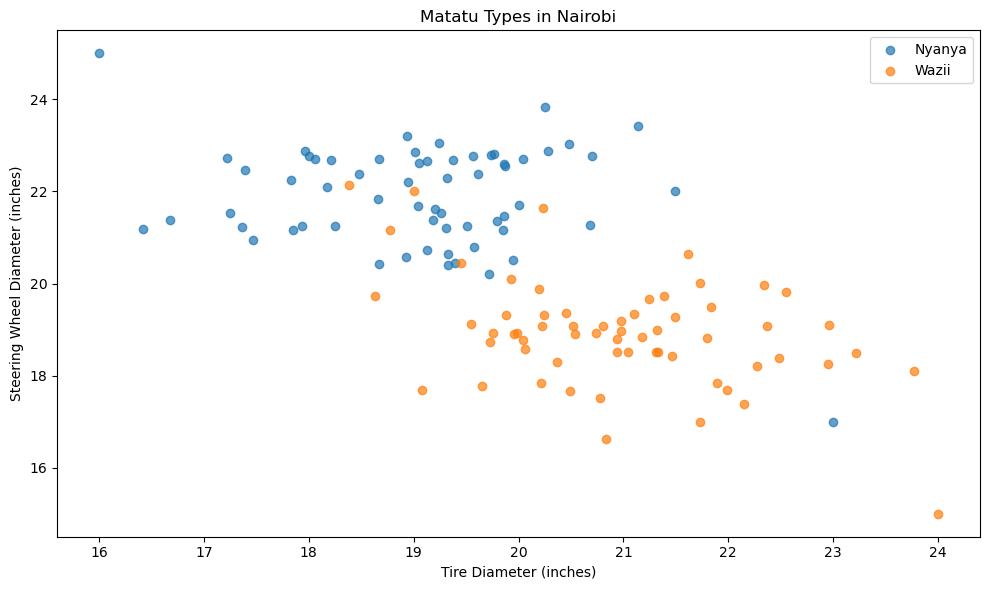

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


nyanya_tire_diameter = np.random.normal(19, 1, 60)
nyanya_steering_diameter = np.random.normal(22, 1, 60)

# Wazii: Tire diameter > 20, Steering wheel <= 20
wazii_tire_diameter = np.random.normal(21, 1, 60)
wazii_steering_diameter = np.random.normal(19, 1, 60)

# Add some outliers
nyanya_tire_diameter = np.append(nyanya_tire_diameter, [16, 23])
nyanya_steering_diameter = np.append(nyanya_steering_diameter, [25, 17])

wazii_tire_diameter = np.append(wazii_tire_diameter, [24, 19])
wazii_steering_diameter = np.append(wazii_steering_diameter, [15, 22])

# Combine the data into a DataFrame
data_close = pd.DataFrame({
    'Tire_Diameter': np.concatenate([nyanya_tire_diameter, wazii_tire_diameter]),
    'Steering_Diameter': np.concatenate([nyanya_steering_diameter, wazii_steering_diameter]),
    'Type': ['Nyanya'] * len(nyanya_tire_diameter) + ['Wazii'] * len(wazii_tire_diameter)
})

# Create scatter plot
plt.figure(figsize=(10, 6))
for label, color in zip(['Nyanya', 'Wazii'], ['blue', 'red']):
    subset = data_close[data_close['Type'] == label]
    plt.scatter(subset['Tire_Diameter'], subset['Steering_Diameter'], label=label, alpha=0.7)


plt.xlabel('Tire Diameter (inches)')
plt.ylabel('Steering Wheel Diameter (inches)')
plt.title('Matatu Types in Nairobi')
plt.legend()
plt.tight_layout()
plt.show()

What if we could predict the Tire_Diameter based on the steering_wheel diamete r? We can do that with regression.

Loaded matatu_data.csv
Data prepared: 124 samples, 1 feature(s).
X_data shape: (124, 1)
Y_data shape: (124,)
--- Starting Training (User Structure) ---
Epochs: 1000, Learning Rate: 0.0005
Initial weights (incl. bias): [0.00892205 0.00375351]
Epoch 100/1000: Cost (0.5*MSE) = 5.0387
Epoch 200/1000: Cost (0.5*MSE) = 4.4158
Epoch 300/1000: Cost (0.5*MSE) = 3.9934
Epoch 400/1000: Cost (0.5*MSE) = 3.6782
Epoch 500/1000: Cost (0.5*MSE) = 3.6332
Epoch 600/1000: Cost (0.5*MSE) = 3.2590
Epoch 700/1000: Cost (0.5*MSE) = 3.0739
Epoch 800/1000: Cost (0.5*MSE) = 2.7197
Epoch 900/1000: Cost (0.5*MSE) = 2.6664
Epoch 1000/1000: Cost (0.5*MSE) = 2.5442
--- Training Complete ---
Final weights (incl. bias): [ 0.35326494 12.76597046]
Final cost (0.5*MSE): 2.5442

Extracted parameters: Weight(s) m = [0.35326494], Bias b = 12.7660


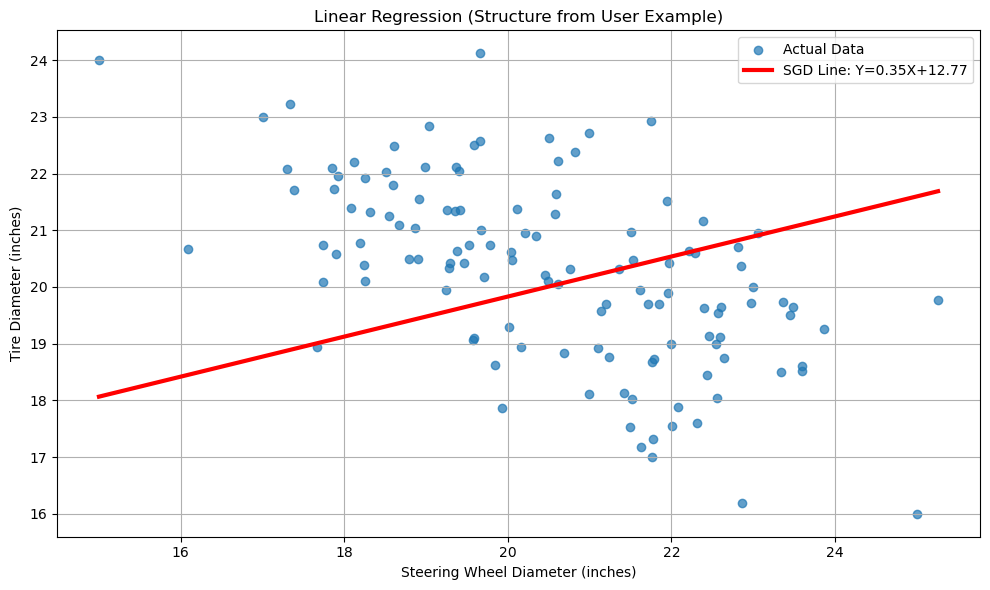

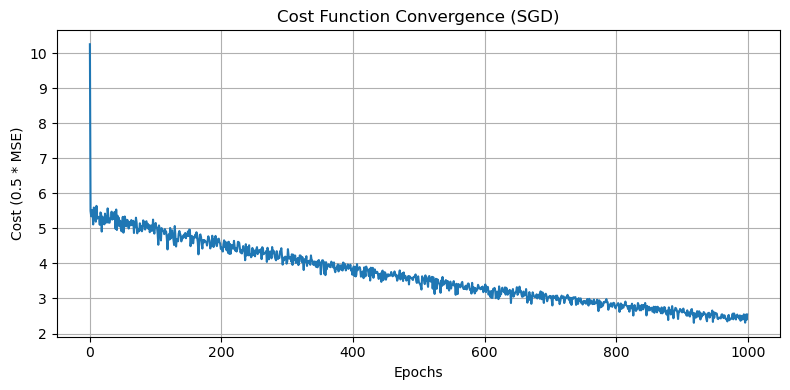

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron.

    Attributes
    ----------
    activation_function : function
        The activation function applied (identity for linear regression).
    w_ : numpy.ndarray
        Weights and bias [w1, w2, ..., bias]. Initialized in __init__.
    errors_: list
        Mean of (0.5 * error^2) per epoch during training.
    """
    def __init__(self, activation_function, n_features):
        """
        Initializes the neuron.
        Args:
            activation_function (callable): The activation function.
            n_features (int): Number of input features.
        """
        self.activation_function = activation_function
        # Initialize weights and bias randomly in __init__
        # Size is n_features + 1 (for bias)
        self.w_ = np.random.rand(1 + n_features) * 0.01 # Small random values
        self.errors_ = []

    def train(self, X, y, alpha=0.005, epochs=50):
        """
        Iterates the stochastic gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha.
        Args:
            X (np.ndarray): Feature matrix, shape (n_samples, n_features).
            y (np.ndarray): Target vector, shape (n_samples,).
            alpha (float): Learning rate.
            epochs (int): Number of passes through the dataset.
        """
        self.errors_ = [] # Reset errors at the start of training
        n_samples = X.shape[0]

        print(f"--- Starting Training (User Structure) ---")
        print(f"Epochs: {epochs}, Learning Rate: {alpha}")
        print(f"Initial weights (incl. bias): {self.w_}")

        for epoch in range(epochs):
            epoch_squared_errors = 0
            # Combine features and targets and shuffle them for SGD
            indices = list(range(n_samples))
            random.shuffle(indices)

            for i in indices:
                xi = X[i]     # Single feature vector (e.g., [steering_diam])
                target = y[i] # Corresponding target (e.g., tire_diam)

                # 1. Predict using current weights
                prediction = self.predict(xi)

                # 2. Calculate error
                error = (prediction - target)

                # 3. Update weights and bias based on error
                # Ensure xi has the same shape alignment if needed, but usually works
                self.w_[:-1] -= alpha * error * xi # Update weights
                self.w_[-1] -= alpha * error      # Update bias

                # 4. Accumulate squared error for monitoring
                epoch_squared_errors += 0.5 * (error**2)

            # Calculate average squared error for the epoch and store
            average_epoch_error = epoch_squared_errors / n_samples
            self.errors_.append(average_epoch_error)

            # Optional: Print progress
            if (epoch + 1) % (epochs // 10 or 1) == 0:
                print(f"Epoch {epoch+1}/{epochs}: Cost (0.5*MSE) = {average_epoch_error:.4f}")
                if np.isnan(average_epoch_error) or np.isinf(average_epoch_error):
                     print("\nWarning: Cost unstable!")
                     # return # Optional early stop

        print("--- Training Complete ---")
        print(f"Final weights (incl. bias): {self.w_}")
        if self.errors_:
             print(f"Final cost (0.5*MSE): {self.errors_[-1]:.4f}")

        return self # Return self to allow chaining if desired

    def predict(self, X):
        """
        Uses the weights/bias and activation function to make predictions.
        Args:
            X (np.ndarray): Feature vector(s). Assumes shape (n_features,)
                            or (n_samples, n_features).
        Returns:
            float or np.ndarray: Prediction(s).
        """
        # Calculate linear combination (preactivation)
        # Handle both single sample (1D array) and multiple samples (2D array)
        if X.ndim == 1:
             preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        else: # Assume X is (n_samples, n_features)
             preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]

        # Apply activation function
        return self.activation_function(preactivation)


try:
    df = pd.read_csv("matatu_data.csv")
    print("Loaded matatu_data.csv")
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

try:
    # Reshape X to be (n_samples, 1) as expected by np.dot
    X_data = df['Steering_Diameter'].values.reshape(-1, 1)
    Y_data = df['Tire_Diameter'].values
    n_features = X_data.shape[1] 
    print(f"Data prepared: {len(X_data)} samples, {n_features} feature(s).")
    print(f"X_data shape: {X_data.shape}")
    print(f"Y_data shape: {Y_data.shape}")
except KeyError as e:
    print(f"Error: Column {e} not found in CSV.")
    exit()
except Exception as e:
    print(f"Error preparing data: {e}")
    exit()

#instantiate the neuron!
identity_activation = lambda x: x
neuron = SingleNeuron(activation_function=identity_activation, n_features=n_features)

learning_rate_alpha = 0.0005
train_epochs = 1000
neuron.train(X_data, Y_data, alpha=learning_rate_alpha, epochs=train_epochs)

# Extract weights and bias from the neuron's w_ attribute
if hasattr(neuron, 'w_'): 
    final_w = neuron.w_[:-1] 
    final_b = neuron.w_[-1] 
    print(f"\nExtracted parameters: Weight(s) m = {final_w}, Bias b = {final_b:.4f}")
    valid_params = not (np.any(np.isnan(neuron.w_)) or np.any(np.isinf(neuron.w_)))
else:
    print("Training did not complete successfully. Cannot extract parameters.")
    valid_params = False


if valid_params:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_data[:, 0], Y_data, alpha=0.7, label='Actual Data')

    # Create line data
    x_line = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
    # Predict y values using the neuron
    y_line = neuron.predict(x_line.reshape(-1, 1))
    # Or manually: y_line = final_w[0] * x_line + final_b

    plt.plot(x_line, y_line, color='red', linewidth=3, label=f'SGD Line: Y={final_w[0]:.2f}X+{final_b:.2f}')
    plt.xlabel('Steering Wheel Diameter (inches)')
    plt.ylabel('Tire Diameter (inches)')
    plt.title(f'Linear Regression (Structure from User Example)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Cost History (using neuron.errors_)
    if neuron.errors_:
        plt.figure(figsize=(8, 4))
        plt.plot(range(len(neuron.errors_)), neuron.errors_)
        plt.xlabel("Epochs")
        plt.ylabel("Cost (0.5 * MSE)") 
        plt.title("Cost Function Convergence (SGD)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Cost history was not recorded.")

else:
    print("Cannot plot results due to invalid parameters.")